# Tarea #3 - Big Data

María Yorleni Alfaro Alfaro


# Datos de entrada


Se utilizará un conjunto de datos tomado de Kaggle (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) llamado "Red Wine Quality" (archivo "winequality-red.csv").
Este conjunto de datos está relacionado con variantes del vino tinto portugués "Vinho Verde" y su calidad.

Dado que en esta tarea se solicita que el modelo a entrenar sea de clasificación binaria, se agregó una columna al archivo winequality-red.csv llamada "high quality" que se basa en la columna "quality" (la cual es un valor entre 0 y 10), para determinar si el vino tinto es de alta calidad o no (si quality > 5, entonces "high quality" = 1, sino "high quality" = 0). 

La variable de predicción a utilizar es "high quality".

Esta es la información de las columnas del dataset:

#### Columnas:
* <strong>fixed acidity</strong> acidez fija, ácidos fijos involucrados con el vino (que no se evaporan fácilmente).
* <strong>volatile acidity</strong> acidez volátil, la cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.
* <strong>citric acid</strong> ácido cítrico, que encontrado en pequeñas cantidades, puede agregar 'frescura' y sabor a los vinos.
* <strong>residual sugar</strong> azúcar residual, la cantidad de azúcar que queda después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo / litro y los vinos con más de 45 gramos / litro se consideran dulces.
* <strong>chlorides</strong> cloruros, la cantidad de sal en el vino.
* <strong>free sulfur dioxide</strong> dióxido de azufre libre, la forma libre del SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
* <strong>total sulfur dioxide</strong> dióxido de azufre total, la cantidad de formas libres y unidas de SO2; en bajas concentraciones el SO2 es casi indetectable en el vino, pero en concentraciones de SO2 libre superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
* <strong>density</strong> densidad, la densidad es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
* <strong>pH</strong> describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
* <strong>sulphates</strong> sulfatos, un aditivo para el vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como antimicrobiano y antioxidante.
* <strong>alcohol</strong> porcentaje de alcohol contenido en el vino
* <strong>quality</strong> calidad del vino, basado en datos sensoriales, puntuado entre 0 y 10
* <strong>high quality</strong> indica si la calidad del vino es alta (calidad mayor a 5) o no (calidad menor o igual a 5).

# Preprocesamiento de datos

## Cargado y limpieza de datos de archivo de entrada CSV 

In [22]:
# Cargar el conjunto de datos completo. Este paso no realiza ningún ajuste; simplemente lectura
import findspark
findspark.init('/usr/lib/python3.7/site-packages/pyspark')

from pyspark.sql.types import (StringType, IntegerType, FloatType, 
                               DecimalType, StructField, StructType,BooleanType)

from pyspark.sql import SparkSession

%config IPCompleter.greedy=True

spark = SparkSession \
    .builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
    .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
    .getOrCreate()

# Cargar el conjunto de datos. Esta vez desde la base de datos

# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "escuelas_ids") \
    .load()

# df = spark \
#     .read \
#     .format("csv") \
#     .option("path", "winequality-red.csv") \
#     .option("header", True) \
#     .schema(StructType([
#                 StructField("fixed acidity", FloatType()),
#                 StructField("volatile acidity", FloatType()),
#                 StructField("citric acid", FloatType()),
#                 StructField("residual sugar", FloatType()),
#                 StructField("chlorides", FloatType()),
#                 StructField("free sulfur dioxide", FloatType()),
#                 StructField("total sulfur dioxide", FloatType()),
#                 StructField("density", FloatType()),
#                 StructField("pH", FloatType()),
#                 StructField("sulphates", FloatType()),
#                 StructField("alcohol", FloatType()),
#                 StructField("quality", StringType()),
#                 StructField("high quality", StringType())])) \
#     .load()

print ("Definición del esquema:")
df.printSchema()

print ("Datos cargados exitosamente:")
df.show()


Definición del esquema:
root
 |-- llave: integer (nullable = true)
 |-- nombre_ins: string (nullable = true)
 |-- creacion00: integer (nullable = true)
 |-- direg15: integer (nullable = true)
 |-- cdpr15: integer (nullable = true)
 |-- cdcan15: integer (nullable = true)
 |-- cddis15: integer (nullable = true)
 |-- regplan15: integer (nullable = true)
 |-- zona15: integer (nullable = true)
 |-- mit_15: integer (nullable = true)
 |-- mih_15: integer (nullable = true)
 |-- rt_15: integer (nullable = true)
 |-- rh_15: integer (nullable = true)
 |-- aprobt_15: integer (nullable = true)
 |-- aprobh_15: integer (nullable = true)
 |-- reprot_15: integer (nullable = true)
 |-- reproh_15: integer (nullable = true)
 |-- desa_15: integer (nullable = true)
 |-- desah_15: integer (nullable = true)
 |-- desert_15: integer (nullable = true)
 |-- deserh_15: integer (nullable = true)
 |-- act_15: integer (nullable = true)
 |-- ach_15: integer (nullable = true)
 |-- nst_15: integer (nullable = true)
 |--

In [23]:
# Seleccionar un subconjunto de las columnas de interés (en este caso se quita quality) y el objectivo que es high quality
columns_kept = [ 
    'mit_15', 'rt_15', 'aprobt_15', 'reprot_15', 'desa_15', 'desert_15', 'act_15', 'nst_15', 'sit_15', 
    'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'inft15', 'olat15',  
    'salt15', 'comt15', 'bibt15', 'gimt15', 'talt_ai15', 'otalt15', 'sodt15', 'indt15', 'lavt15', 
    'sant15', 'tvt15', 'vbt15', 'dvdt15', 'cetoi15', 'cetos15', 'cptoi15', 'cptos15', 
    'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15', 
    'agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15', 
    'frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'PromocionAlta', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS'  
    ]

selected_columns_df = df.select(columns_kept)

selected_columns_df.show()

+------+-----+---------+---------+-------+---------+------+------+------+-------+-----------+-----------+-----+------+------+------+------+------+------+---------+-------+------+------+------+------+-----+-----+------+-------+-------+-------+-------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+------+-------+------+------+------+------+------+------+----------+----------+-------------+-------------------+-----------------------+---------------+-------------------+-----+
|mit_15|rt_15|aprobt_15|reprot_15|desa_15|desert_15|act_15|nst_15|sit_15|embt_15|embmenor_15|embmayor_15|aat15|inft15|olat15|salt15|comt15|bibt15|gimt15|talt_ai15|otalt15|sodt15|indt15|lavt15|sant15|tvt15|vbt15|dvdt15|cetoi15|cetos15|cptoi15|cptos15|expto_15|expdef_15|exptem_15|agrve_15|agrvep_15|agrveo_15|agrfe_15|agrfep_15|agrfeo_15|agree_15|agreep_15|agreeo_15|a

In [24]:
# Se verifica que no existan columnas con valores nulos en el dataset a utilizar
from pyspark.sql.functions import col


# Verifica que no haya quedado ninguna columna con valores nulos
cantidad_nulos = 0
for columna in columns_kept:
    selected_columns_df_null = selected_columns_df.where(col(columna).isNull())
    if selected_columns_df_null.count() != 0:
        cantidad_nulos = cantidad_nulos + selected_columns_df_null.count()
        print ("Existen valores nulos en la columna: ", columna)   

if  cantidad_nulos == 0:
    print ("No existe ninguna columna con valores nulos.")  


No existe ninguna columna con valores nulos.


## Gráficos y estadísticas descriptivas previo al entrenamiento

### Estadísticas descriptivas

In [10]:
# Información descriptiva del dataframe.
selected_columns_df.describe(['mit_15', 'mih_15', 'rt_15', 'rh_15', 'aprobt_15', 'aprobh_15', 'reprot_15', 'reproh_15', 'desa_15', 'desah_15', 'desert_15', 'deserh_15', 'act_15', 'ach_15', 'nst_15', 'nsh_15', 'sit_15']).show()
selected_columns_df.describe(['sih_15', 'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'aab15', 'apt15', 'apb15', 'aest15', 'aesb15', 'aaet15', 'aaeb15', 'anat15', 'anab15', 'inft15', 'infb15', 'olat15', 'olab15']).show()
selected_columns_df.describe(['salt15', 'salb15', 'comt15', 'comb15', 'bibt15', 'bibb15', 'gimt15', 'gimb15', 'talt_ai15', 'talb_ai15', 'otalt15', 'otalb15', 'sodt15', 'sodb15', 'indt15', 'indb15', 'lavt15', 'lavb15']).show()
selected_columns_df.describe(['sant15', 'sanb15', 'tvt15', 'tvb15', 'vbt15', 'vbb15', 'dvdt15', 'dvdb15', 'cetoi15', 'cetos15', 'cepei15', 'cepes15', 'cepai15', 'cepas15', 'ceadi15', 'ceads15', 'cptoi15', 'cptos15']).show()
selected_columns_df.describe(['cppei15', 'cppes15', 'cppai15', 'cppas15', 'cpadi15', 'cpads15', 'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15']).show()
selected_columns_df.describe(['agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15']).show()
selected_columns_df.describe(['frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'PromocionAlta', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS']).show()

  

+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+
|summary|            mit_15|           mih_15|             rt_15|             rh_15|         aprobt_15|        aprobh_15|         reprot_15|        reproh_15|           desa_15|           desah_15|         desert_15|         deserh_15|            act_15|           ach_15|            nst_15|           nsh_15|            sit_15|
+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+
|  count|    

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|summary|            sant15|            sanb15|             tvt15|             tvb15|             vbt15|             vbb15|             dvdt15|            dvdb15|           cetoi15|           cetos15|           cepei15|           cepes15|           cepai15|           cepas15|           ceadi15|            ceads15|           cptoi15|          cptos15|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------------+-----------------+-------------------+------------------+
|summary|            frh_15|             itt_15|            ith_15|        extrant_15|        extranh_15|      PromocionAlta|Dimension_Economica|Dimension_Participacion|  Dimension_Salud|Dimension_Educativa|               IDS|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------------+-----------------+-------------------+------------------+
|  count|              4021|               4021|              4021|              4021|              4021|               4021|               4021|                   4021|             4021|               4021|              4021|
|   mean|2.1591643869684156|0.27978114896791845|0.1454861974633176| 4.251678686893808|2.2862

### Histogramas

Histograma para la columna: mit_15


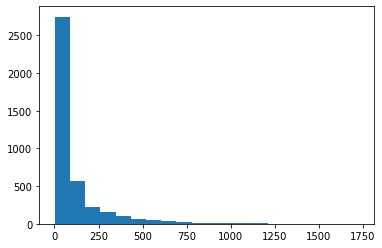

Histograma para la columna: mih_15


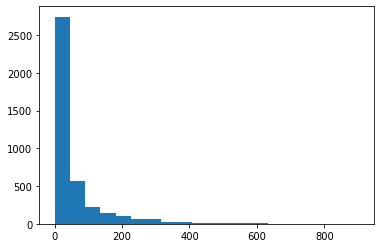

Histograma para la columna: rt_15


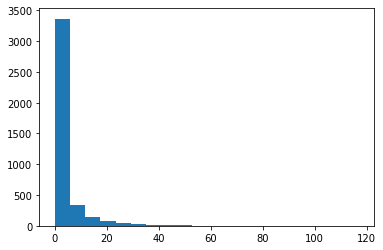

Histograma para la columna: rh_15


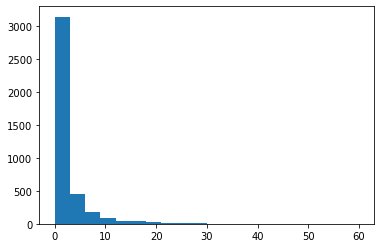

Histograma para la columna: aprobt_15


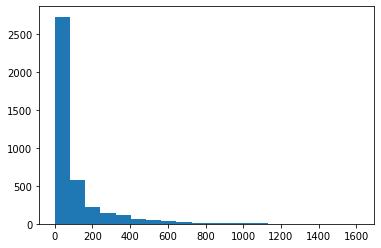

Histograma para la columna: aprobh_15


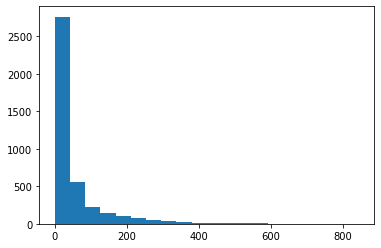

Histograma para la columna: reprot_15


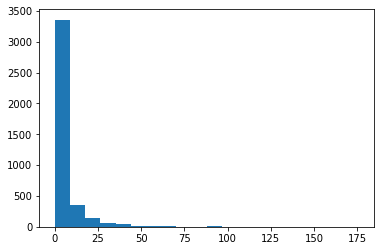

Histograma para la columna: reproh_15


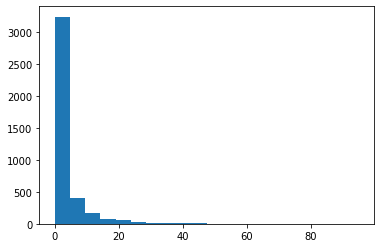

Histograma para la columna: desa_15


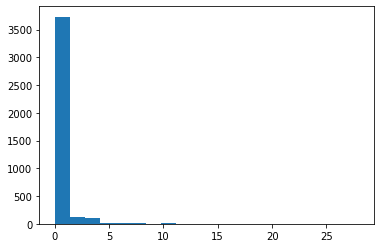

Histograma para la columna: desah_15


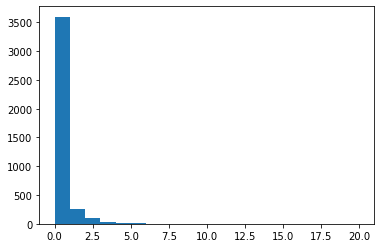

Histograma para la columna: desert_15


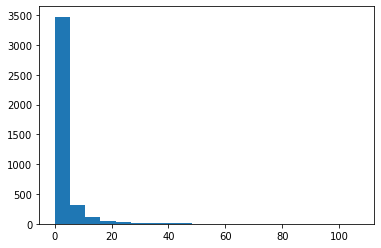

Histograma para la columna: deserh_15


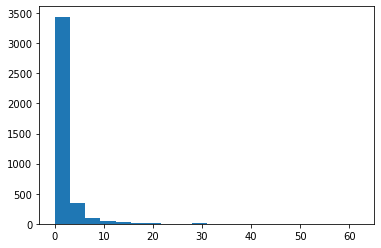

Histograma para la columna: act_15


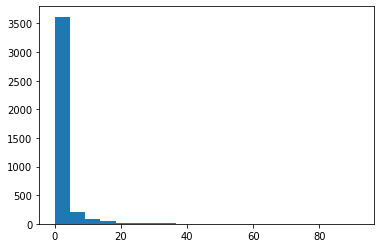

Histograma para la columna: ach_15


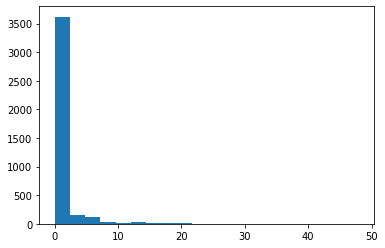

Histograma para la columna: nst_15


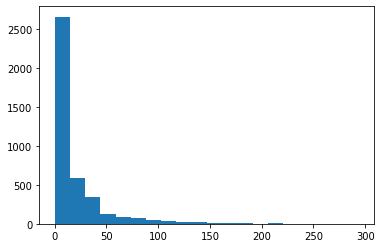

Histograma para la columna: nsh_15


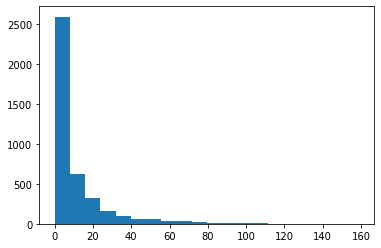

Histograma para la columna: sit_15


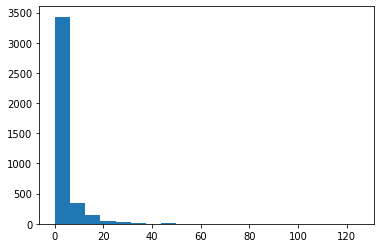

Histograma para la columna: sih_15


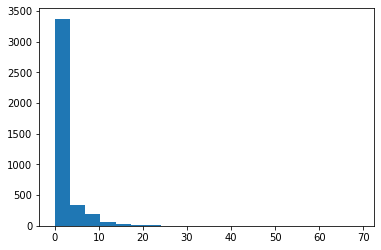

Histograma para la columna: embt_15


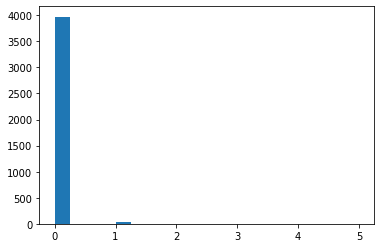

Histograma para la columna: embmenor_15


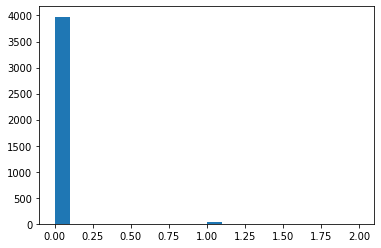

Histograma para la columna: embmayor_15


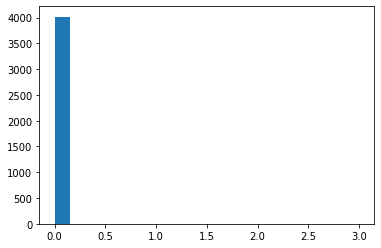

Histograma para la columna: aat15


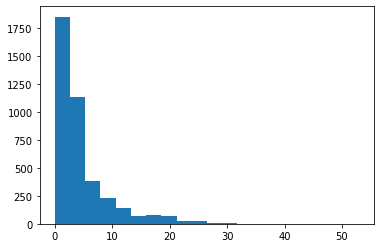

Histograma para la columna: aab15


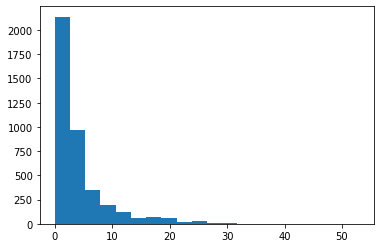

Histograma para la columna: apt15


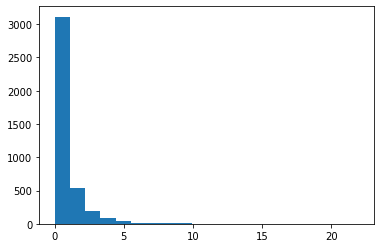

Histograma para la columna: apb15


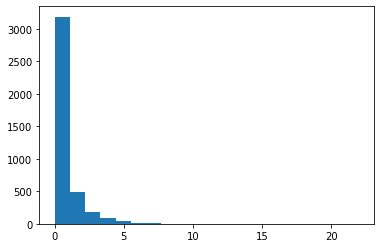

Histograma para la columna: aest15


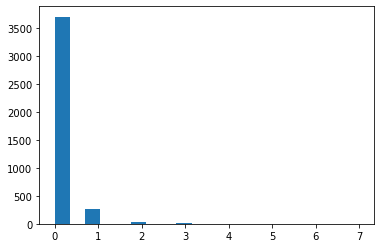

Histograma para la columna: aesb15


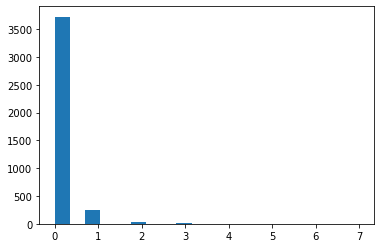

Histograma para la columna: aaet15


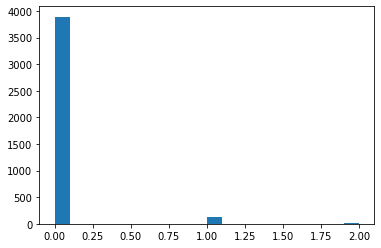

Histograma para la columna: aaeb15


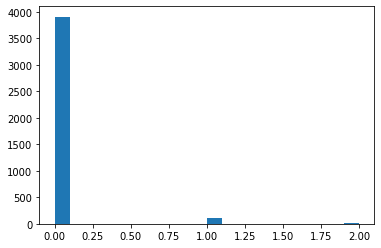

Histograma para la columna: anat15


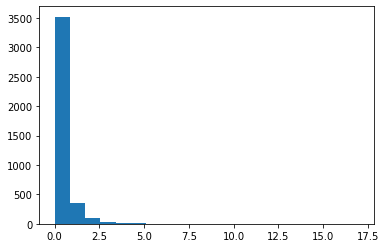

Histograma para la columna: anab15


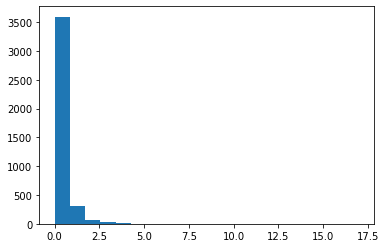

Histograma para la columna: inft15


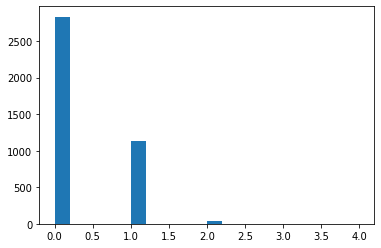

Histograma para la columna: infb15


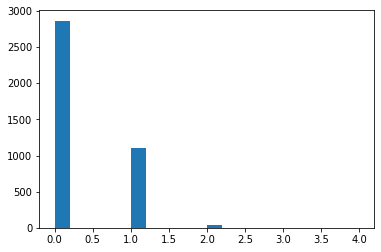

Histograma para la columna: olat15


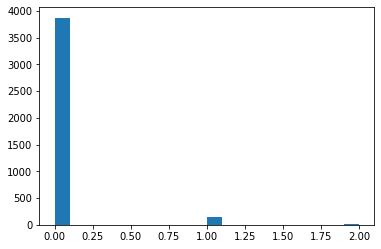

Histograma para la columna: olab15


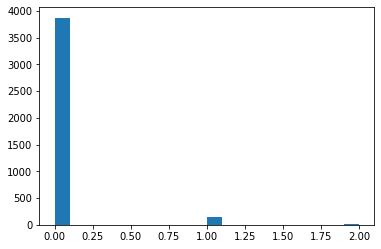

Histograma para la columna: salt15


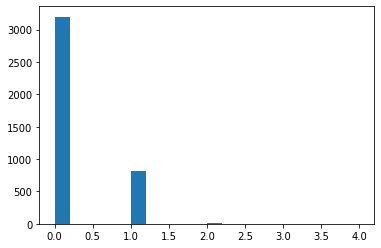

Histograma para la columna: salb15


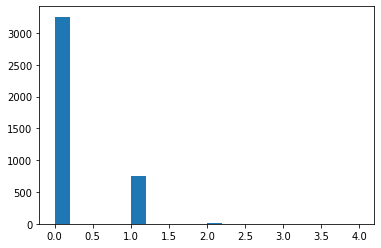

Histograma para la columna: comt15


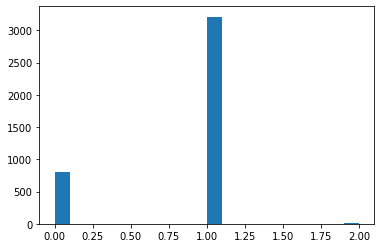

Histograma para la columna: comb15


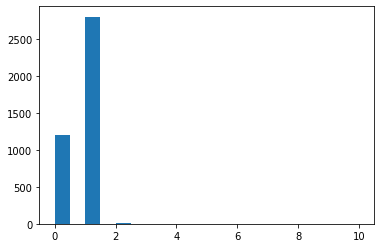

Histograma para la columna: bibt15


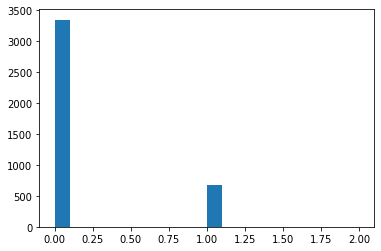

Histograma para la columna: bibb15


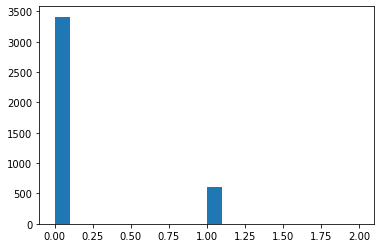

Histograma para la columna: gimt15


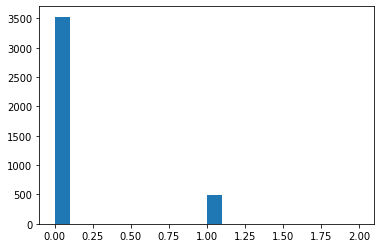

Histograma para la columna: gimb15


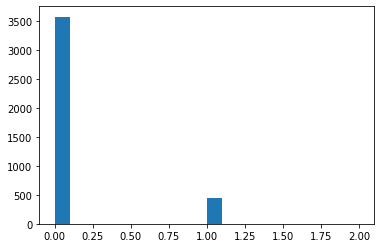

Histograma para la columna: talt_ai15


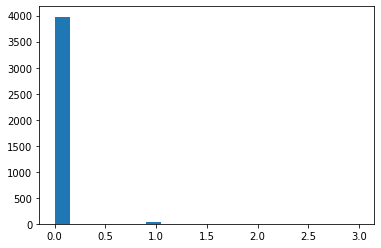

Histograma para la columna: talb_ai15


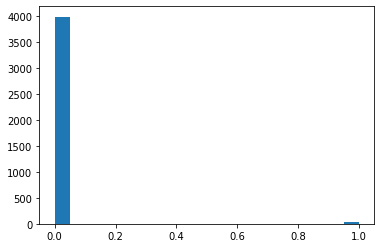

Histograma para la columna: otalt15


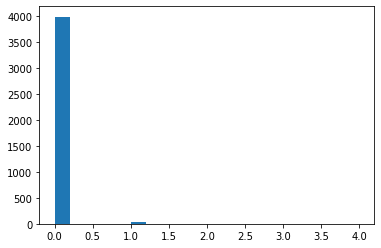

Histograma para la columna: otalb15


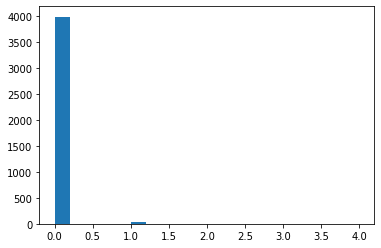

Histograma para la columna: sodt15


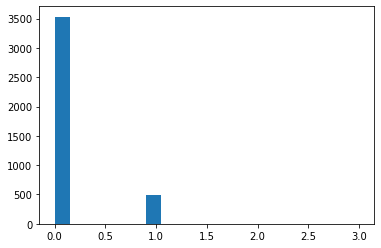

Histograma para la columna: sodb15


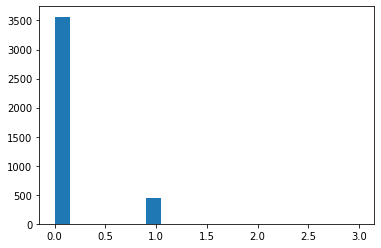

Histograma para la columna: indt15


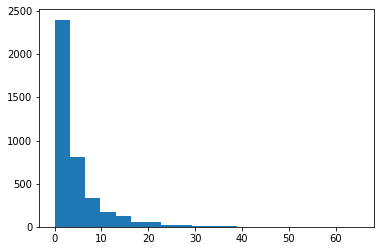

Histograma para la columna: indb15


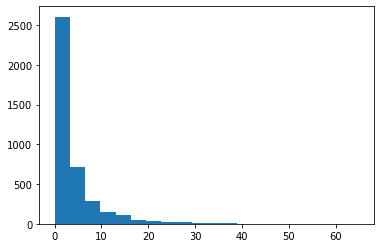

Histograma para la columna: lavt15


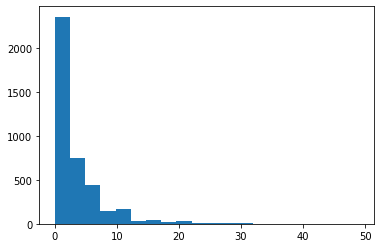

Histograma para la columna: lavb15


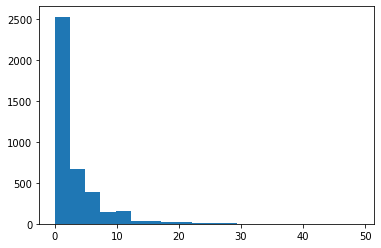

Histograma para la columna: sant15


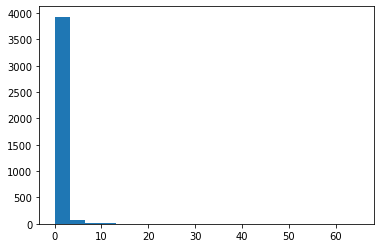

Histograma para la columna: sanb15


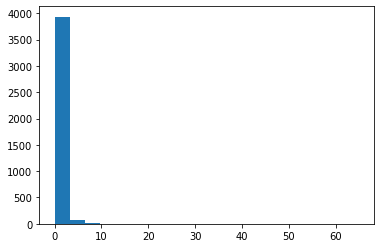

Histograma para la columna: tvt15


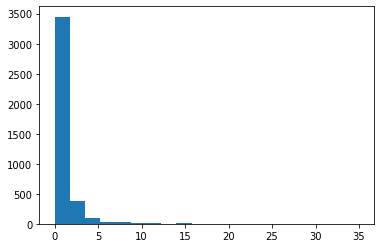

Histograma para la columna: tvb15


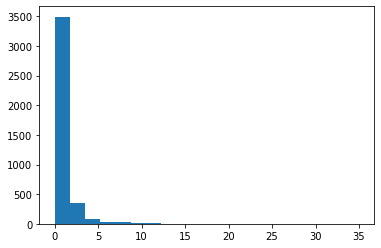

Histograma para la columna: vbt15


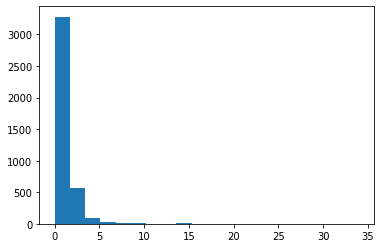

Histograma para la columna: vbb15


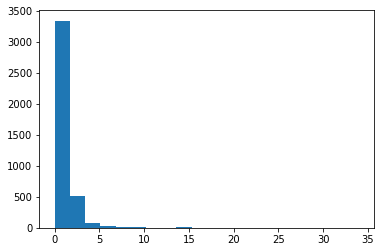

Histograma para la columna: dvdt15


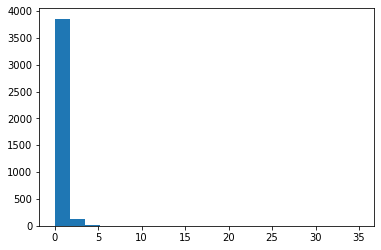

Histograma para la columna: dvdb15


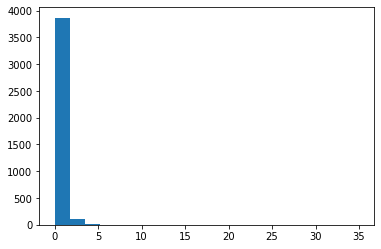

Histograma para la columna: cetoi15


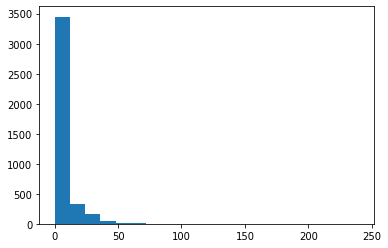

Histograma para la columna: cetos15


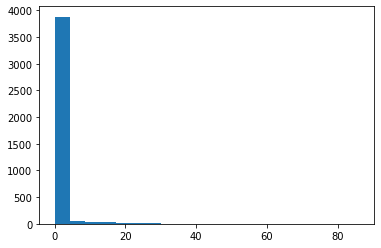

Histograma para la columna: cepei15


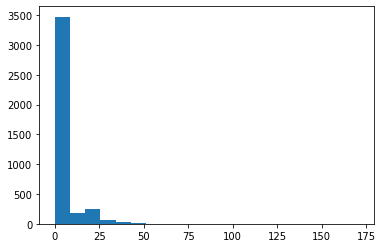

Histograma para la columna: cepes15


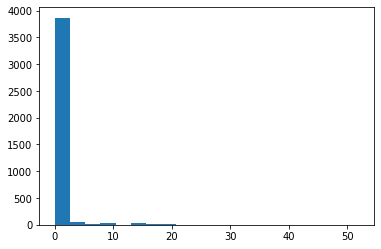

Histograma para la columna: cepai15


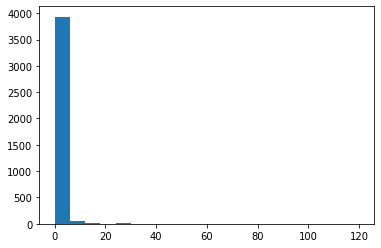

Histograma para la columna: cepas15


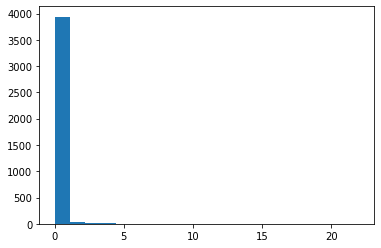

Histograma para la columna: ceadi15


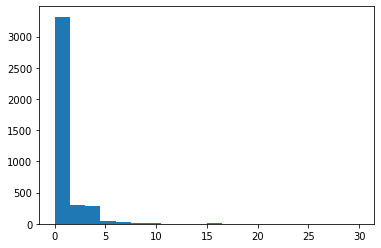

Histograma para la columna: ceads15


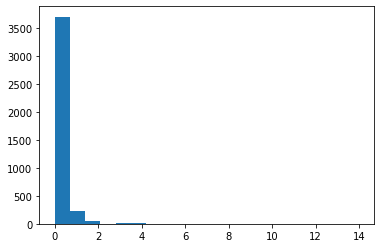

Histograma para la columna: cptoi15


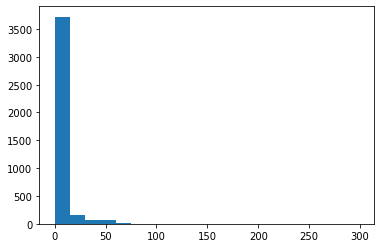

Histograma para la columna: cptos15


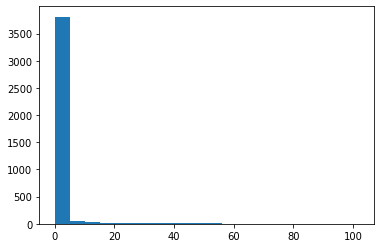

Histograma para la columna: cppei15


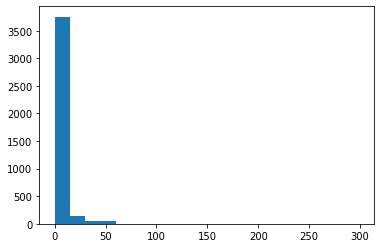

Histograma para la columna: cppes15


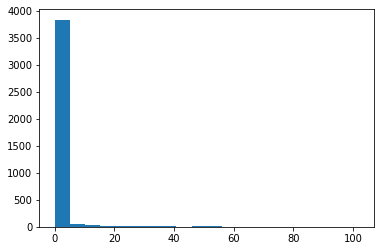

Histograma para la columna: cppai15


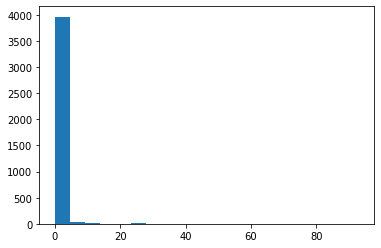

Histograma para la columna: cppas15


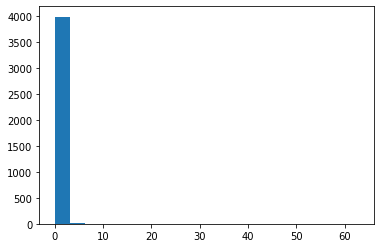

Histograma para la columna: cpadi15


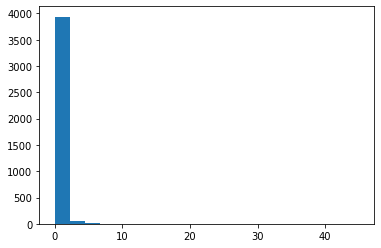

Histograma para la columna: cpads15


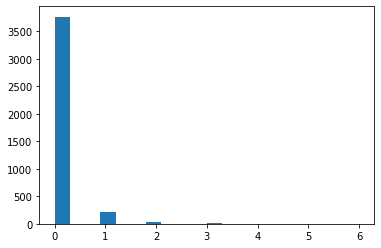

Histograma para la columna: expto_15


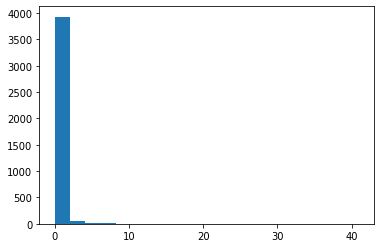

Histograma para la columna: expdef_15


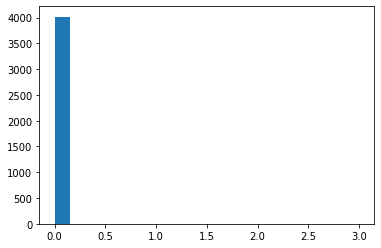

Histograma para la columna: exptem_15


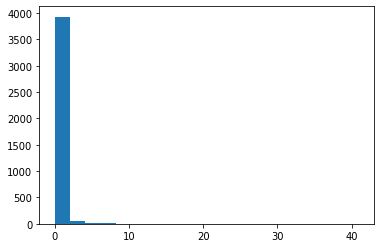

Histograma para la columna: agrve_15


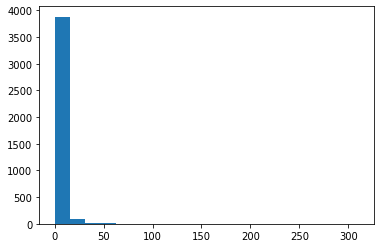

Histograma para la columna: agrvep_15


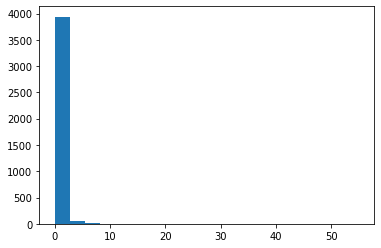

Histograma para la columna: agrveo_15


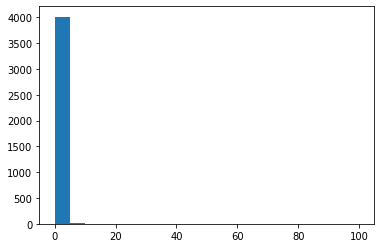

Histograma para la columna: agrfe_15


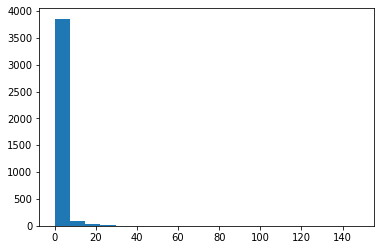

Histograma para la columna: agrfep_15


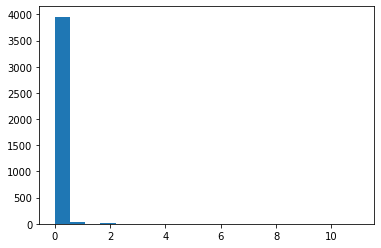

Histograma para la columna: agrfeo_15


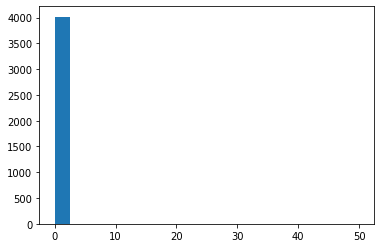

Histograma para la columna: agree_15


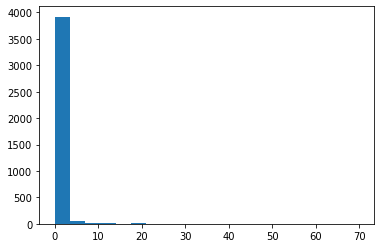

Histograma para la columna: agreep_15


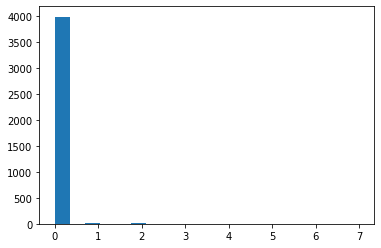

Histograma para la columna: agreeo_15


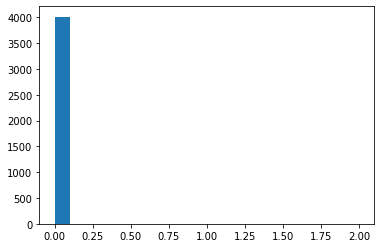

Histograma para la columna: agrre_15


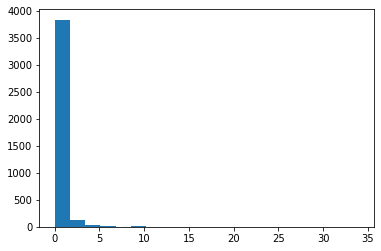

Histograma para la columna: agrrep_15


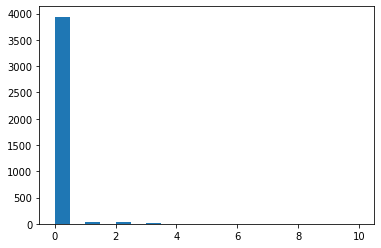

Histograma para la columna: agrreo_15


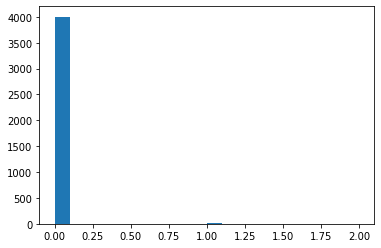

Histograma para la columna: agrde_15


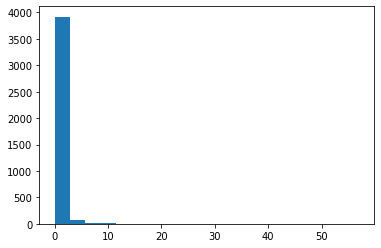

Histograma para la columna: agrdep_15


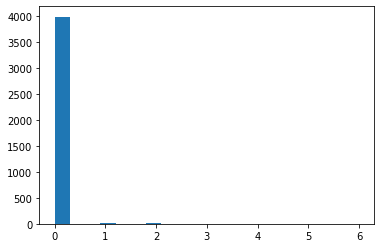

Histograma para la columna: agrdeo_15


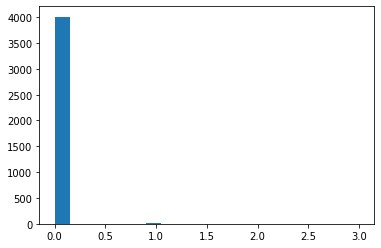

Histograma para la columna: agroe_15


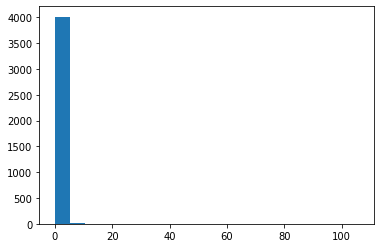

Histograma para la columna: agroep_15


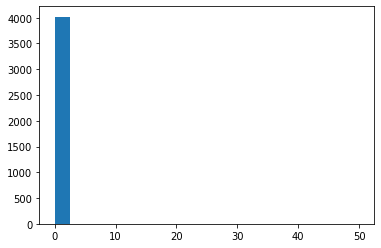

Histograma para la columna: agroeo_15


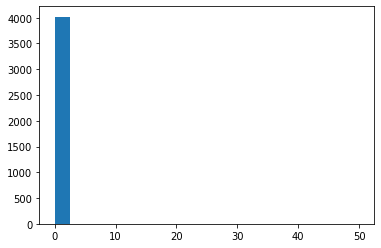

Histograma para la columna: int_15


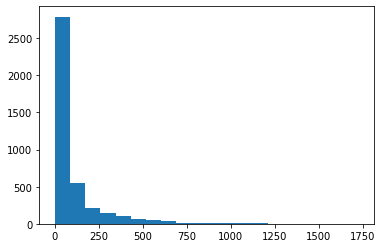

Histograma para la columna: inht_15


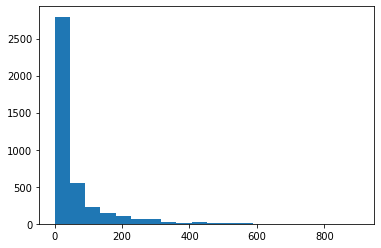

Histograma para la columna: rit_15


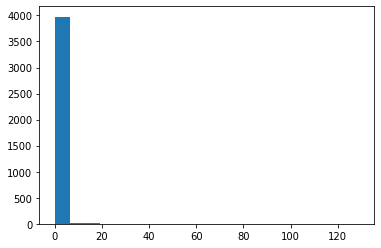

Histograma para la columna: rih_15


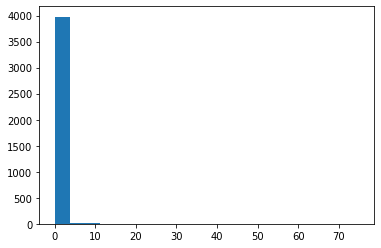

Histograma para la columna: frt_15


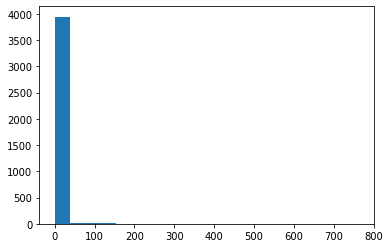

Histograma para la columna: frh_15


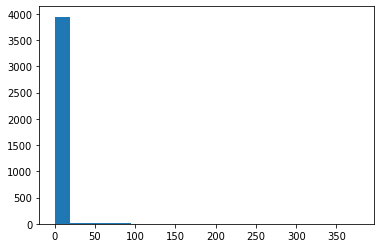

Histograma para la columna: itt_15


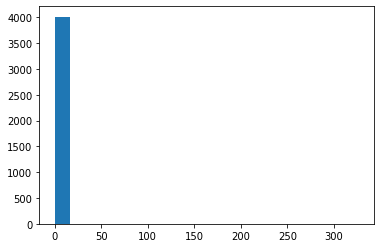

Histograma para la columna: ith_15


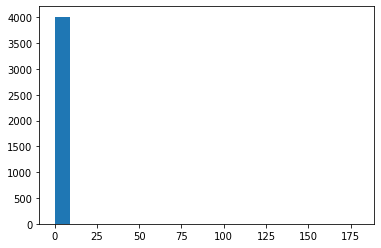

Histograma para la columna: extrant_15


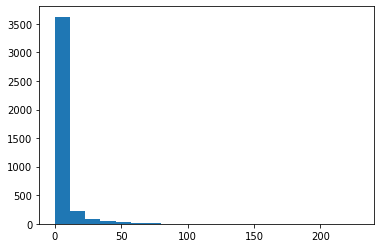

Histograma para la columna: extranh_15


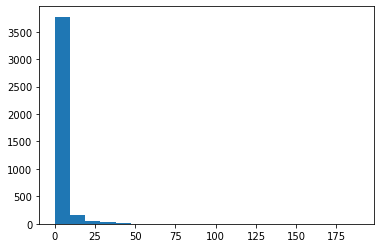

Histograma para la columna: PromocionAlta


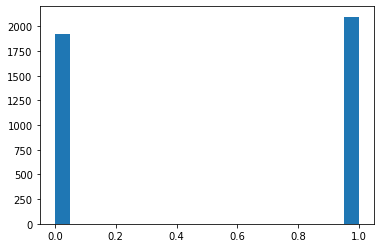

Histograma para la columna: Dimension_Economica


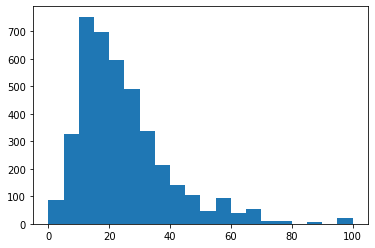

Histograma para la columna: Dimension_Participacion


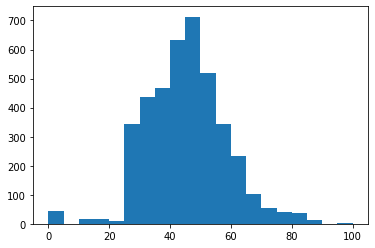

Histograma para la columna: Dimension_Salud


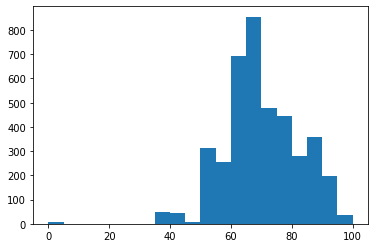

Histograma para la columna: Dimension_Educativa


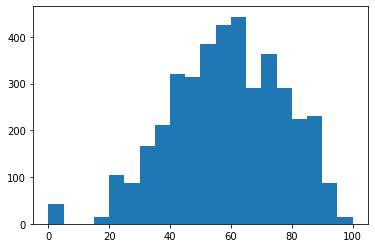

Histograma para la columna: IDS


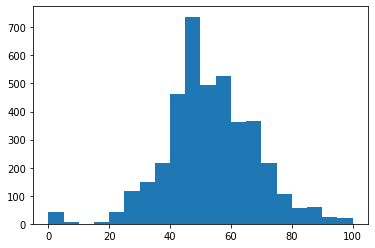

In [11]:
import matplotlib.pyplot as plt

# Genera un histograma para cada una de las columnas del dataframe
def HistogramaColumnas(columns, df):
    for col in columns:
        print("Histograma para la columna:", col)
        bins, counts = df.select(col).rdd.flatMap(lambda x: x).histogram(20)
        plt.hist(bins[:-1], bins=bins, weights=counts)
        plt.show()
    
HistogramaColumnas(columns_kept, selected_columns_df)  

### Correlaciones

+--------------------+-------------+
|            features|PromocionAlta|
+--------------------+-------------+
|(68,[0,2,3,7,8,12...|            1|
|(68,[0,2,6,7,12,1...|            1|
|(68,[0,1,2,3,5,6,...|            0|
|(68,[0,2,5,12,13,...|            1|
|(68,[0,1,2,3,5,7,...|            1|
|(68,[0,1,2,3,5,7,...|            0|
|(68,[0,1,2,3,6,7,...|            0|
|(68,[0,1,2,3,4,6,...|            1|
|(68,[0,1,2,3,6,7,...|            0|
|(68,[0,1,2,3,5,6,...|            1|
|(68,[0,1,2,3,5,6,...|            1|
|(68,[0,1,2,3,5,6,...|            0|
|(68,[0,1,2,3,4,5,...|            1|
|(68,[0,1,2,3,7,8,...|            1|
|(68,[0,2,7,12,13,...|            1|
|(68,[0,1,2,3,4,5,...|            0|
|(68,[0,1,2,3,7,8,...|            1|
|(68,[0,1,2,3,4,6,...|            0|
|(68,[0,1,2,3,5,7,...|            0|
|(68,[0,1,2,3,5,7,...|            1|
+--------------------+-------------+
only showing top 20 rows

Matriz de correlación de Pearson:
+------+-----+---------+---------+-------+---------+

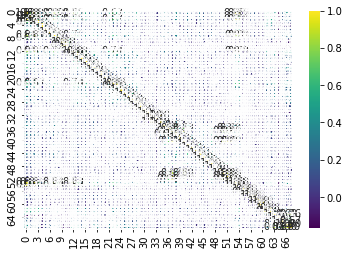

In [25]:
# Para realizar operaciones más detalladas es necesario expresar las filas originales en vectores
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['mit_15', 'rt_15', 'aprobt_15', 'reprot_15', 'desa_15', 'desert_15', 'act_15', 'nst_15', 'sit_15', 
    'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'inft15', 'olat15',  
    'salt15', 'comt15', 'bibt15', 'gimt15', 'talt_ai15', 'otalt15', 'sodt15', 'indt15', 'lavt15', 
    'sant15', 'tvt15', 'vbt15', 'dvdt15', 'cetoi15', 'cetos15', 'cptoi15', 'cptos15', 
    'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15', 
    'agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15', 
    'frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS'],
    outputCol='features')

vector_df = assembler.transform(selected_columns_df)
vector_df = vector_df.select(['features', 'PromocionAlta'])
vector_df.show()

# Con la representación de vectores podemos calcular correlaciones
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Genera la matriz de correlación de Pearson
pearson_matrix = Correlation.corr(vector_df, 'features').collect()[0][0]
print("Matriz de correlación de Pearson:")
sns.heatmap(pearson_matrix.toArray(), annot=True, fmt=".2f", cmap='viridis')

selected_columns_df.show()


## Normalización / Estandarización

In [26]:
# Es deseable que los datos se encuentren estandarizados o normalizados, para evitar que la magnitud de ciertos atributos 
# dominen el proceso de entrenamiento. El módulo pyspark.ml.feature tiene varias alternativas. En este caso se usa StandardScaler.
from pyspark.ml.feature import StandardScaler

standard_scaler = StandardScaler(inputCol='features', outputCol='scaled')
scale_model = standard_scaler.fit(vector_df)

scaled_df = scale_model.transform(vector_df)
print("Datos estandarizados:")
scaled_df.show()

selected_columns_df.show()

Datos estandarizados:
+--------------------+-------------+--------------------+
|            features|PromocionAlta|              scaled|
+--------------------+-------------+--------------------+
|(68,[0,2,3,7,8,12...|            1|(68,[0,2,3,7,8,12...|
|(68,[0,2,6,7,12,1...|            1|(68,[0,2,6,7,12,1...|
|(68,[0,1,2,3,5,6,...|            0|(68,[0,1,2,3,5,6,...|
|(68,[0,2,5,12,13,...|            1|(68,[0,2,5,12,13,...|
|(68,[0,1,2,3,5,7,...|            1|(68,[0,1,2,3,5,7,...|
|(68,[0,1,2,3,5,7,...|            0|(68,[0,1,2,3,5,7,...|
|(68,[0,1,2,3,6,7,...|            0|(68,[0,1,2,3,6,7,...|
|(68,[0,1,2,3,4,6,...|            1|(68,[0,1,2,3,4,6,...|
|(68,[0,1,2,3,6,7,...|            0|(68,[0,1,2,3,6,7,...|
|(68,[0,1,2,3,5,6,...|            1|(68,[0,1,2,3,5,6,...|
|(68,[0,1,2,3,5,6,...|            1|(68,[0,1,2,3,5,6,...|
|(68,[0,1,2,3,5,6,...|            0|(68,[0,1,2,3,5,6,...|
|(68,[0,1,2,3,4,5,...|            1|(68,[0,1,2,3,4,5,...|
|(68,[0,1,2,3,7,8,...|            1|(68,[0,1,2,3,7

## Escritura a base de datos


In [6]:
# Una vez que los datos fueron depurados se procede a escribir el conjunto de datos que se utilizará como base para el entrenamiento, 
# a una tabla llamada tarea3 (con overwrite).
selected_columns_df \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "tarea") \
    .save()

print ("El conjunto de datos fue escrito a base de datos, a una tabla llamada tarea3.")

El conjunto de datos fue escrito a base de datos, a una tabla llamada tarea3.


# Entrenamiento de modelos

## Cargar de la base de datos el conjunto de datos limpio

In [28]:
# Cargar el conjunto de datos. Esta vez desde la base de datos

# Reading single DataFrame in Spark by retrieving all rows from a DB table.
# df = spark \
#     .read \
#     .format("jdbc") \
#     .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
#     .option("user", "postgres") \
#     .option("password", "testPassword") \
#     .option("dbtable", "tarea3") \
#     .load()

selected_columns_df.show()
# Una vez que se leen los datos en df, se le agregan a df las columnas features y scaled para entrenar los modelos.
# Agregar columna features al dataframe df
selected_columns_df = assembler.transform(selected_columns_df)
# Agregar columna scaled al dataframe df
selected_columns_df = scale_model.transform(selected_columns_df)

selected_columns_df.show()

+------+-----+---------+---------+-------+---------+------+------+------+-------+-----------+-----------+-----+------+------+------+------+------+------+---------+-------+------+------+------+------+-----+-----+------+-------+-------+-------+-------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+------+-------+------+------+------+------+------+------+----------+----------+-------------+-------------------+-----------------------+---------------+-------------------+-----+
|mit_15|rt_15|aprobt_15|reprot_15|desa_15|desert_15|act_15|nst_15|sit_15|embt_15|embmenor_15|embmayor_15|aat15|inft15|olat15|salt15|comt15|bibt15|gimt15|talt_ai15|otalt15|sodt15|indt15|lavt15|sant15|tvt15|vbt15|dvdt15|cetoi15|cetos15|cptoi15|cptos15|expto_15|expdef_15|exptem_15|agrve_15|agrvep_15|agrveo_15|agrfe_15|agrfep_15|agrfeo_15|agree_15|agreep_15|agreeo_15|a

+------+-----+---------+---------+-------+---------+------+------+------+-------+-----------+-----------+-----+------+------+------+------+------+------+---------+-------+------+------+------+------+-----+-----+------+-------+-------+-------+-------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+------+-------+------+------+------+------+------+------+----------+----------+-------------+-------------------+-----------------------+---------------+-------------------+-----+--------------------+--------------------+
|mit_15|rt_15|aprobt_15|reprot_15|desa_15|desert_15|act_15|nst_15|sit_15|embt_15|embmenor_15|embmayor_15|aat15|inft15|olat15|salt15|comt15|bibt15|gimt15|talt_ai15|otalt15|sodt15|indt15|lavt15|sant15|tvt15|vbt15|dvdt15|cetoi15|cetos15|cptoi15|cptos15|expto_15|expdef_15|exptem_15|agrve_15|agrvep_15|agrveo_15|agrfe_15|agrfep_1

## Dividir los datos en 2 conjuntos (para entrenamiento y prueba)

In [30]:
# Genera un dataframe nuevo con una columna "features" (a partir de los datos estandarizados de columna scaled) 
# y otra columna "label" (a partir de high quality)
df_new = selected_columns_df.select('mit_15', 'rt_15', 'aprobt_15', 'reprot_15', 'desa_15', 'desert_15', 'act_15', 'nst_15', 'sit_15', 
    'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'inft15', 'olat15',  
    'salt15', 'comt15', 'bibt15', 'gimt15', 'talt_ai15', 'otalt15', 'sodt15', 'indt15', 'lavt15', 
    'sant15', 'tvt15', 'vbt15', 'dvdt15', 'cetoi15', 'cetos15', 'cptoi15', 'cptos15', 
    'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15', 
    'agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15', 
    'frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'PromocionAlta', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS',col("scaled").alias("features"), col("PromocionAlta").alias("label"))

# Separa los datos del dataframe en dos nuevos datasets para entrenamiento y prueba 
# 80% para entrenamiento (train) y 20% para prueba (test)
train, test = df_new.randomSplit([0.8, 0.2], seed=12345)

print ("Los datos del dataframe fueron separados en dos nuevos datasets para entrenamiento y prueba, 80% para entrenamiento (train) y 20% para prueba (test)")

Los datos del dataframe fueron separados en dos nuevos datasets para entrenamiento y prueba, 80% para entrenamiento (train) y 20% para prueba (test)


## Modelo 1: Regresión Logística
## Uso de protocolo K-fold cross validation y Entrenamiento del modelo


In [31]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

# Aplica el protocolo K-fold cross validation para el modelo de regresión logística
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lr_evaluator = BinaryClassificationEvaluator()

lr_paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01])
             .addGrid(lr.maxIter, [10, 20])
             .build())

lr_cv = CrossValidator(estimator=lr, estimatorParamMaps=lr_paramGrid, evaluator=lr_evaluator, numFolds=5)

# Realiza el entrenamiento del modelo
lr_cv_model = lr_cv.fit(train)

trainingSummary = lr_cv_model.bestModel.summary

# Muestra métricas sobre el conjunto de datos de entrenamiento
print("------------------------------------------------------------------------------")
print("ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation")
print("------------------------------------------------------------------------------")
print(" - Total de Iteraciones:", trainingSummary.totalIterations)
print(" - Historial de Cada Iteración:", trainingSummary.objectiveHistory)
print(" - Exactitud:", trainingSummary.accuracy)
print(" - Area bajo la curva ROC:", trainingSummary.areaUnderROC)



------------------------------------------------------------------------------
ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation
------------------------------------------------------------------------------
 - Total de Iteraciones: 20
 - Historial de Cada Iteración: [0.6922912564275395, 0.6553178107940483, 0.6141193354377749, 0.5999790698715585, 0.5648155160474598, 0.5345118776741552, 0.4984664514494461, 0.47471306935605245, 0.45943658202007914, 0.4570559242376301, 0.45563664528799297, 0.45530532095289566, 0.4549189443012584, 0.45486212819637994, 0.4546982902578433, 0.45453590027212426, 0.4543806132886272, 0.4541456339431571, 0.45398161190375425, 0.4538978626064704, 0.45379838579200493]
 - Exactitud: 0.8625194401244168
 - Area bajo la curva ROC: 0.9558615679588671


## Modelo 2: Random Forest
## Uso de protocolo K-fold cross validation y Entrenamiento del modelo

In [32]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

# Aplica el protocolo K-fold cross validation para el modelo de random forest
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_evaluator = BinaryClassificationEvaluator()

rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [3, 10])
             .build())

rf_cv = CrossValidator(estimator=rf, estimatorParamMaps=rf_paramGrid, evaluator=rf_evaluator, numFolds=5)

# Realiza el entrenamiento del modelo
rf_cv_model = rf_cv.fit(train)

trainingSummary = rf_cv_model.bestModel.summary

# Muestra métricas sobre el conjunto de datos de entrenamiento
print("------------------------------------------------------------------------------")
print("ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation")
print("------------------------------------------------------------------------------")
print(" - Exactitud:", trainingSummary.accuracy)
print(" - Area bajo la curva ROC:", trainingSummary.areaUnderROC)



------------------------------------------------------------------------------
ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation
------------------------------------------------------------------------------
 - Exactitud: 0.8799377916018662
 - Area bajo la curva ROC: 0.9569179193637604


# Evaluación de conjunto de validación

## Evaluación y almacenado de modelo 1

In [36]:
#Predicción del modelo
predictions = lr_cv_model.transform(test)

print("Datos de predicción del modelo 1:")
predictions.select('features','PromocionAlta', 'prediction').show()

# Evaluación del modelo, usando la métrica de "área bajo la curva ROC (areaUnderROC)"
evaluator_modelo1 = lr_evaluator.evaluate(predictions,{lr_evaluator.metricName: "areaUnderROC"})

print("------------------------------------------------------------------------------")
print("EVALUACIÓN: Métrica del modelo 1:")
print("------------------------------------------------------------------------------")
print(" - Área bajo la curva ROC:", evaluator_modelo1)

predictions.show()

# Almacenar los datos de la predicción en la base de datos, a una tabla llamada "modelo1" (con overwrite) 
predictions.select('mit_15', 'rt_15', 'aprobt_15', 'reprot_15', 'desa_15', 'desert_15', 'act_15', 'nst_15', 'sit_15', 
    'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'inft15', 'olat15',  
    'salt15', 'comt15', 'bibt15', 'gimt15', 'talt_ai15', 'otalt15', 'sodt15', 'indt15', 'lavt15', 
    'sant15', 'tvt15', 'vbt15', 'dvdt15', 'cetoi15', 'cetos15', 'cptoi15', 'cptos15', 
    'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15', 
    'agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15', 
    'frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'PromocionAlta', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS', col("prediction").alias("prediccion")) \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo1") \
    .save()
print("\n\n\nDatos de predicción almacenados exitosamente en tabla 'modelo1'.")
      
print("\nSelecciona y muestra datos almacenados en tabla modelo1:")
# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df_modelo1 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo1") \
    .option("top", "10") \
    .load()

df_modelo1.show()


Datos de predicción del modelo 1:
+--------------------+-------------+----------+
|            features|PromocionAlta|prediction|
+--------------------+-------------+----------+
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,1,2,7,12,1...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,7,12,16,...|            1|       1.0|
|(68,[0,2,3,7,12,6...|            1|       1.0|
|(68,[0,1,2,7,12,1...|            1|       1.0|
|(68,[0,2,5,12,22,...|            0|       0.0|
|(68,[0,2,5,12,63,...|            0|       1.0|
|(68,[0,2,3,12,16,...|            0|       1.0|
|(68,[




Datos de predicción almacenados exitosamente en tabla 'modelo1'.

Selecciona y muestra datos almacenados en tabla modelo1:
+------+-----+---------+---------+-------+---------+------+------+------+-------+-----------+-----------+-----+------+------+------+------+------+------+---------+-------+------+------+------+------+-----+-----+------+-------+-------+-------+-------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+--------+---------+---------+------+-------+------+------+------+------+------+------+----------+----------+-------------+-------------------+-----------------------+---------------+-------------------+-----+----------+
|mit_15|rt_15|aprobt_15|reprot_15|desa_15|desert_15|act_15|nst_15|sit_15|embt_15|embmenor_15|embmayor_15|aat15|inft15|olat15|salt15|comt15|bibt15|gimt15|talt_ai15|otalt15|sodt15|indt15|lavt15|sant15|tvt15|vbt15|dvdt15|cetoi15|ceto

## Evaluación y almacenado de modelo 2

In [38]:
#Predicción del modelo
predictions = rf_cv_model.transform(test)

print("Datos de predicción del modelo 2:")
predictions.select('features','PromocionAlta', 'prediction').show()

# Evaluación del modelo, usando la métrica de "área bajo la curva ROC (areaUnderROC)"
evaluator_modelo2 = rf_evaluator.evaluate(predictions,{lr_evaluator.metricName: "areaUnderROC"})

print("------------------------------------------------------------------------------")
print("EVALUACIÓN: Métrica del modelo 2:")
print("------------------------------------------------------------------------------")
print(" - Área bajo la curva ROC:", evaluator_modelo2)

# Almacenar los datos de la predicción en la base de datos, a una tabla llamada "modelo2" (con overwrite)
predictions.select('mit_15', 'rt_15', 'aprobt_15', 'reprot_15', 'desa_15', 'desert_15', 'act_15', 'nst_15', 'sit_15', 
    'embt_15', 'embmenor_15', 'embmayor_15', 'aat15', 'inft15', 'olat15',  
    'salt15', 'comt15', 'bibt15', 'gimt15', 'talt_ai15', 'otalt15', 'sodt15', 'indt15', 'lavt15', 
    'sant15', 'tvt15', 'vbt15', 'dvdt15', 'cetoi15', 'cetos15', 'cptoi15', 'cptos15', 
    'expto_15', 'expdef_15', 'exptem_15', 'agrve_15', 'agrvep_15', 'agrveo_15', 'agrfe_15', 'agrfep_15', 'agrfeo_15', 'agree_15', 
    'agreep_15', 'agreeo_15', 'agrre_15', 'agrrep_15', 'agrreo_15', 'agrde_15', 'agrdep_15', 'agrdeo_15', 'agroe_15', 'agroep_15', 'agroeo_15', 'int_15', 'inht_15', 'rit_15', 'rih_15', 'frt_15', 
    'frh_15', 'itt_15', 'ith_15', 'extrant_15', 'extranh_15', 'PromocionAlta', 'Dimension_Economica', 'Dimension_Participacion', 'Dimension_Salud','Dimension_Educativa', 'IDS', col("prediction").alias("prediccion")) \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo2") \
    .save()
print("\n\n\nDatos de predicción almacenados exitosamente en tabla 'modelo2'.")
      

print("\nSelecciona y muestra datos almacenados en tabla modelo2:")
# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df_modelo2 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo2") \
    .option("top", "10") \
    .load()

df_modelo2.show()


Datos de predicción del modelo 2:
+--------------------+-------------+----------+
|            features|PromocionAlta|prediction|
+--------------------+-------------+----------+
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,22,23...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,1,2,7,12,1...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,12,16,22...|            1|       1.0|
|(68,[0,2,7,12,16,...|            1|       1.0|
|(68,[0,2,3,7,12,6...|            1|       0.0|
|(68,[0,1,2,7,12,1...|            1|       1.0|
|(68,[0,2,5,12,22,...|            0|       0.0|
|(68,[0,2,5,12,63,...|            0|       0.0|
|(68,[0,2,3,12,16,...|            0|       1.0|
|(68,[

## Análisis de resultados

#### Introducción Teórica 

La medición del rendimiento es una tarea esencial. Por lo tanto, cuando se trata de un problema de clasificación, podemos contar con una curva AUC-ROC. Esta es una de las métricas de evaluación más importante para verificar el rendimiento de cualquier modelo de clasificación.

ROC viene de las características de funcionamiento del receptor y AUC del área bajo la curva.

La curva ROC nos dice qué tan bueno puede distinguir el modelo entre dos cosas.

El AUC es el área bajo la curva ROC. Este puntaje nos da una buena idea de qué tan bien funciona el modelo.

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

El AUC es conveniente por las dos razones siguientes:

- El AUC es invariable con respecto a la escala. Mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
- El AUC es invariable con respecto al umbral de clasificación. Mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.

Fuente: https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/


#### Análisis y conclusiones

Para el análisis de resultados se utilizó la métrica del "área bajo la curva ROC (AUC)" obtenida tanto para el modelo 1: Regresión Logística, como para el modelo 2: Random Forest, para medir el rendimiento de cada modelo y hacer la comparación entre ambos. 

Como se puede observar en la sección anterior de evaluación de modelo 1, específicamente en la parte dónde se indica "EVALUACIÓN: Métrica del modelo 1" el modelo de Regresión Logística muestra un área bajo la curva ROC de 0.76, lo que significa que hay 76% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa.

Para el caso del modelo Random Forest, en la sección anterior de evaluación de modelo 2, específicamente en la parte dónde se indica "EVALUACIÓN: Métrica del modelo 2" se muestra un área bajo la curva ROC de 0.82, lo que significa que hay 82% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa.

Aunque ninguno de los 2 modelos logran resultados óptimos para este ejercicio, el modelo de Random Forest optiene mejores resultados, dado que presenta un valor más alto del "área bajo la curva ROC". Este rendimiendo superior de Random Forest también se puede observar en los datos de predicción de ambos modelos, presentados en dichas secciones de evaluación, donde se muestra que Random Forest presenta mayor cantidad de predicciones correctas. 

